## Business Objective:

- Objective: Identify the counties and cities in Washington state with the highest and lowest numbers of electric vehicles (EVs).

- Goal: Understand regional adoption trends and identify areas that may benefit from additional support or incentives to encourage higher adoption of EVs.

# Key Columns:
- County
- City
- State
- Postal Code
- Vehicle Location

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#to display plots inline
%matplotlib inline

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Access your dataset
data_path = '/content/gdrive/My Drive/Colab Notebooks/Electiric vehical/cleaned_data.csv'

In [4]:
df = pd.read_csv(data_path)
# Display the first few rows of the DataFrame
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
1,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP,5.307700e+10
2,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP1J,Kitsap,Port Orchard,WA,98367.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,186410087,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09N,Snohomish,Everett,WA,98208.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,186076915,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200040 entries, 0 to 200039
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         200040 non-null  object 
 1   County                                             200040 non-null  object 
 2   City                                               200040 non-null  object 
 3   State                                              200040 non-null  object 
 4   Postal Code                                        200040 non-null  float64
 5   Model Year                                         200040 non-null  int64  
 6   Make                                               200040 non-null  object 
 7   Model                                              200040 non-null  object 
 8   Electric Vehicle Type                              200040 non-null  object

In [6]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,DOL Vehicle ID,2020 Census Tract
count,200040.000000,200040.000000,200040.000000,200040.000000,2.000400e+05,2.000400e+05
mean,98176.168966,2020.871336,53.464812,784.137822,2.262969e+08,5.297545e+10
std,2424.231184,2.994938,88.726489,6133.558906,7.282079e+07,1.605644e+09
min,1731.000000,1997.000000,0.000000,0.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,1.904573e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,2.363394e+08,5.303303e+10
75%,98372.000000,2023.000000,53.000000,0.000000,2.609659e+08,5.305307e+10
max,99577.000000,2025.000000,322.000000,52900.000000,4.792548e+08,5.602100e+10


**Aggregate EV Data by County and City**

In [7]:
ev_count_by_region = df.groupby(['County', 'City']).size().reset_index(name='EV_Count')

In [8]:
print(ev_count_by_region.head())

  County     City  EV_Count
0    Ada    Boise         2
1  Adams   Aurora         1
2  Adams   Hatton         1
3  Adams     Lind         2
4  Adams  Othello        40


**Calculate Z-Scores for Outlier Detection**

In [9]:
from scipy import stats

ev_count_by_region['Z_Score'] = stats.zscore(ev_count_by_region['EV_Count'])

In [10]:
print(ev_count_by_region['Z_Score'].describe())

count    8.290000e+02
mean     2.999879e-17
std      1.000604e+00
min     -1.759265e-01
25%     -1.759265e-01
50%     -1.744623e-01
75%     -1.422498e-01
max      2.369138e+01
Name: Z_Score, dtype: float64


**Identify and Isolate Outliers**

In [11]:
# Filter Outliers

outliers = ev_count_by_region[(ev_count_by_region['Z_Score'] > 2) | (ev_count_by_region['Z_Score'] < -2)]

In [12]:
print(outliers)

        County        City  EV_Count    Z_Score
84       Clark   Vancouver      7081   5.007367
257       King    Bellevue      9959   7.114361
271       King    Issaquah      3037   2.046740
273       King        Kent      3229   2.187304
274       King    Kirkland      5883   4.130307
286       King     Redmond      7165   5.068863
287       King      Renton      5835   4.095166
288       King   Sammamish      5795   4.065882
290       King     Seattle     32602  23.691382
295       King     Tukwila      3118   2.106040
553     Pierce      Tacoma      4204   2.901105
653  Snohomish     Bothell      5250   3.666885
662  Snohomish    Lynnwood      3116   2.104576
704    Spokane     Spokane      3104   2.095791
742   Thurston     Olympia      4829   3.358669
775    Whatcom  Bellingham      3315   2.250265


# Interpreting the Outliers:

# High Z-Scores (Above 2):
- The Z-scores indicate how many standard deviations away a region's EV count is from the mean. A Z-score greater than 2 generally suggests that the region has a higher-than-average number of EVs, making it an outlier.

- Seattle (King County) stands out the most, with a Z-score of 23.69, indicating a very high concentration of EVs compared to other regions.

- Other cities like Bellevue, Vancouver, Redmond, Renton, and Sammamish also have high Z-scores, indicating a significantly higher adoption of EVs.

# **Alternative Approach – Interquartile Range (IQR) Method**

In [13]:
# Calculate IQR
Q1 = ev_count_by_region['EV_Count'].quantile(0.25)
Q3 = ev_count_by_region['EV_Count'].quantile(0.75)
IQR = Q3 - Q1

In [14]:
# Identify Outliers
outliers = ev_count_by_region[(ev_count_by_region['EV_Count'] < (Q1 - 1.5 * IQR)) | (ev_count_by_region['EV_Count'] > (Q3 + 1.5 * IQR))]

In [15]:
# Check for Outliers
print(outliers)

      County           City  EV_Count   Z_Score
32    Benton      Kennewick      1001  0.556177
38    Benton       Richland      1054  0.594979
39    Benton  West Richland       268  0.019545
54    Chelan         Chelan       172 -0.050737
59    Chelan    Leavenworth       279  0.027598
..       ...            ...       ...       ...
776  Whatcom         Blaine       435  0.141806
780  Whatcom       Ferndale       404  0.119111
783  Whatcom         Lynden       263  0.015885
799  Whitman        Pullman       301  0.043705
824   Yakima         Yakima       788  0.400239

[144 rows x 4 columns]


# Interpreting the Non-Outliers:
# Moderate Z-Scores (Around 0):

- The Z-scores close to 0 indicate that the number of EVs in these regions is near the average across all regions analyzed. These cities have a typical or expected level of EV adoption.

- Cities like Kennewick, Richland, West Richland, Chelan, and Leavenworth have Z-scores within a normal range, meaning their EV adoption rates are consistent with the overall distribution.

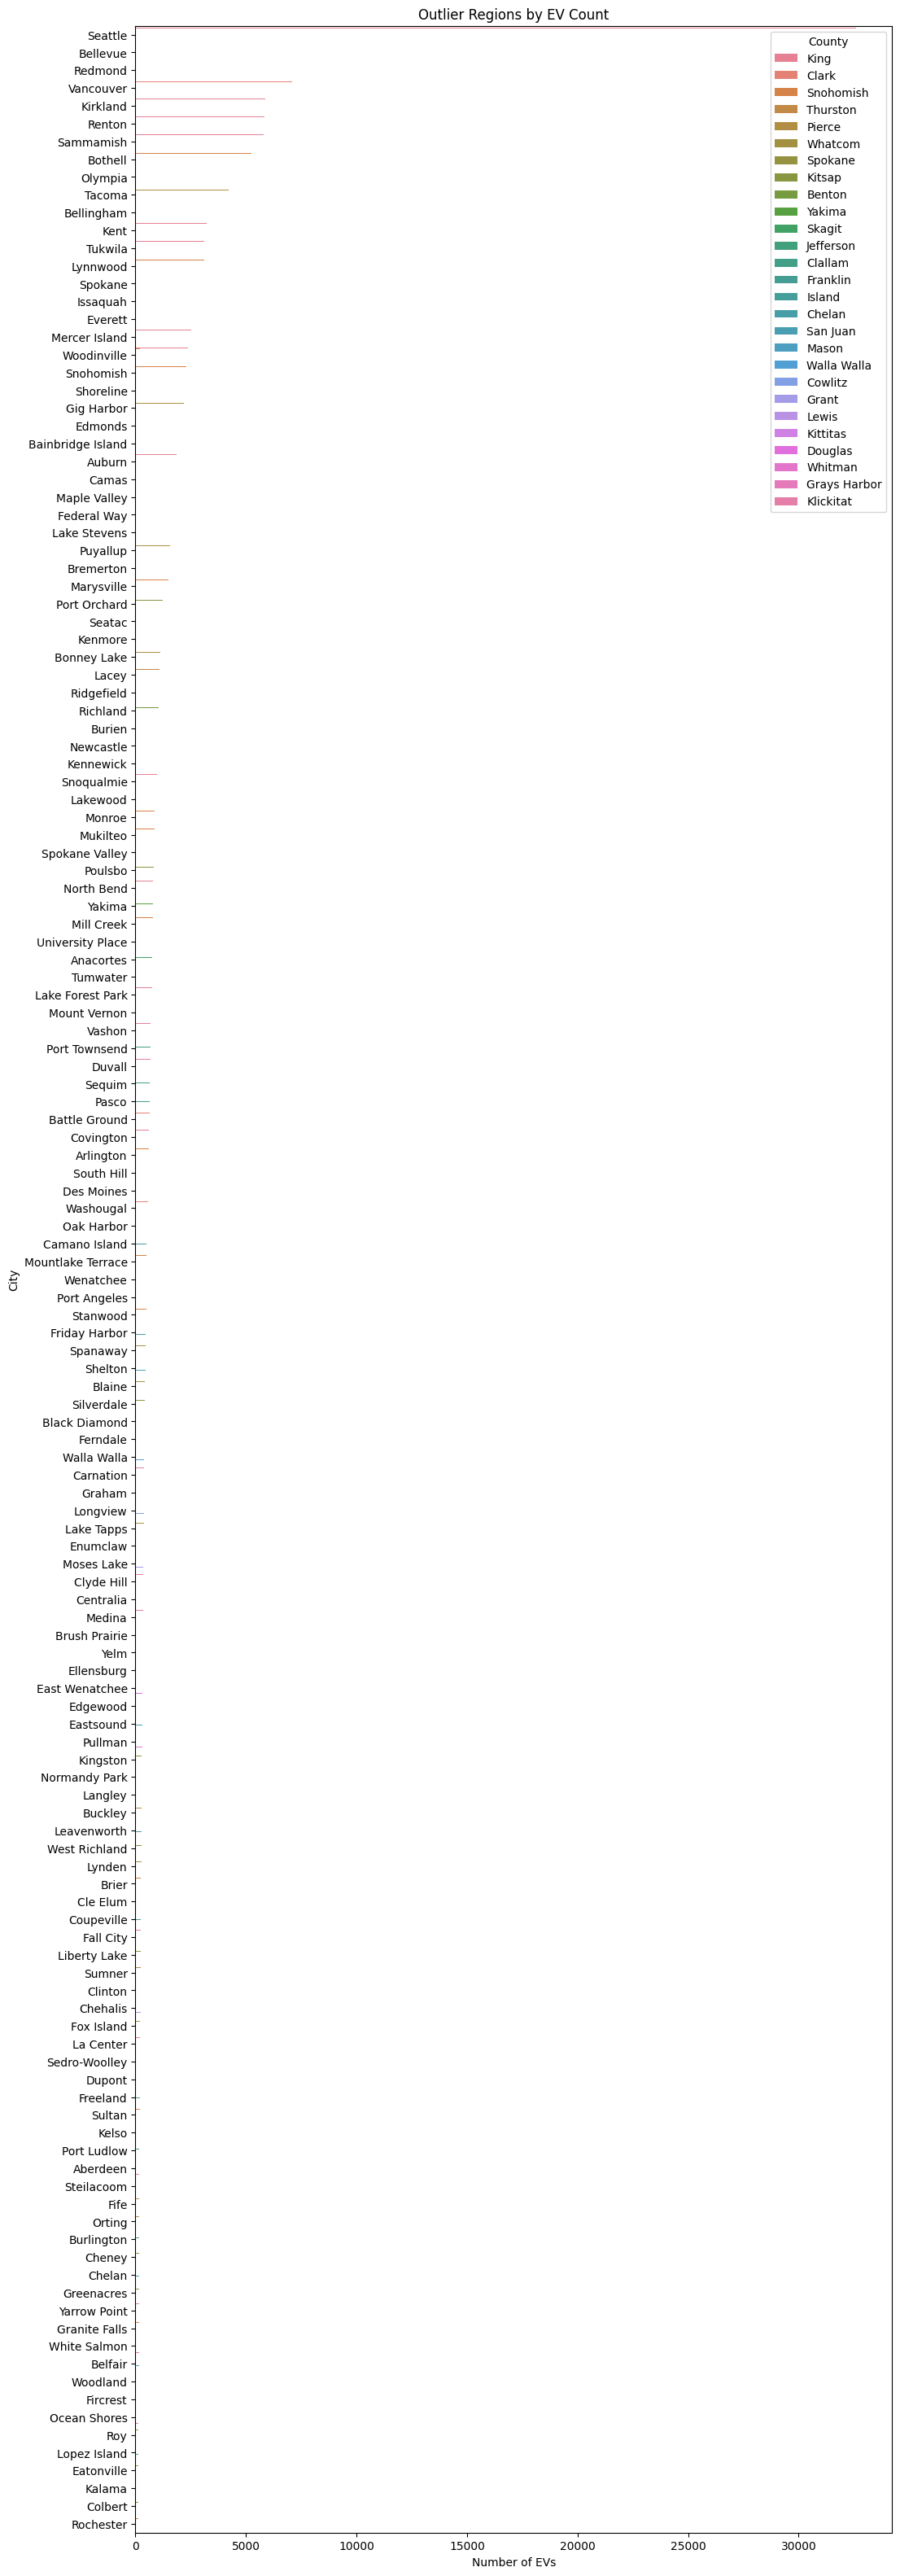

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 40))
sns.barplot(x='EV_Count', y='City', data=outliers.sort_values('EV_Count', ascending=False), hue='County')
plt.title('Outlier Regions by EV Count')
plt.xlabel('Number of EVs')
plt.ylabel('City')
plt.show()

**Identify the Outliers**

In [17]:
from scipy import stats

# Calculate Z-scores for the EV counts
ev_count_by_region['Z_Score'] = stats.zscore(ev_count_by_region['EV_Count'])

# Identify outliers with Z-scores greater than 2 or less than -2
outliers = ev_count_by_region[(ev_count_by_region['Z_Score'] > 2) | (ev_count_by_region['Z_Score'] < -2)]

# Print outliers to confirm
print(outliers)

        County        City  EV_Count    Z_Score
84       Clark   Vancouver      7081   5.007367
257       King    Bellevue      9959   7.114361
271       King    Issaquah      3037   2.046740
273       King        Kent      3229   2.187304
274       King    Kirkland      5883   4.130307
286       King     Redmond      7165   5.068863
287       King      Renton      5835   4.095166
288       King   Sammamish      5795   4.065882
290       King     Seattle     32602  23.691382
295       King     Tukwila      3118   2.106040
553     Pierce      Tacoma      4204   2.901105
653  Snohomish     Bothell      5250   3.666885
662  Snohomish    Lynnwood      3116   2.104576
704    Spokane     Spokane      3104   2.095791
742   Thurston     Olympia      4829   3.358669
775    Whatcom  Bellingham      3315   2.250265


**Remove the Outliers**

In [18]:
# Remove outliers from the original dataset
df_cleaned = ev_count_by_region[(ev_count_by_region['Z_Score'] <= 2) & (ev_count_by_region['Z_Score'] >= -2)]

# Alternatively, if working with the original data before aggregation:
# df_cleaned = df[~df['City'].isin(outliers['City'])]

**Verifying the Data After Removal**

In [19]:
# Check the cleaned dataset
print(df_cleaned.describe())
print(df_cleaned.head())

          EV_Count     Z_Score
count   813.000000  813.000000
mean    113.798278   -0.093346
std     333.669974    0.244281
min       1.000000   -0.175927
25%       1.000000   -0.175927
50%       3.000000   -0.174462
75%      36.000000   -0.150303
max    2874.000000    1.927407
  County     City  EV_Count   Z_Score
0    Ada    Boise         2 -0.175194
1  Adams   Aurora         1 -0.175927
2  Adams   Hatton         1 -0.175927
3  Adams     Lind         2 -0.175194
4  Adams  Othello        40 -0.147374


# Interpreting the Post-Removal Dataset:

After removing the outliers, dataset shows the following characteristics:

# EV_Count:
- Count: 813 cities/counties remain in the dataset.
- Mean: The average number of EVs per city/county is approximately 113.8.
- Standard Deviation (std): The standard deviation is 333.7, indicating a significant spread in EV counts, though this is expected given the nature of geographic data.
- Range: The min value is 1 EV, and the max value is 2,874 EVs.

# Z_Score:
- Mean: The mean Z-score is slightly negative (-0.093), which is typical when some high positive outliers have been removed.

- Range: Z-scores now range from approximately -0.175 to 1.93, which suggests that extreme outliers have been successfully removed, and only moderate variations remain.

**Visualization After Removal**

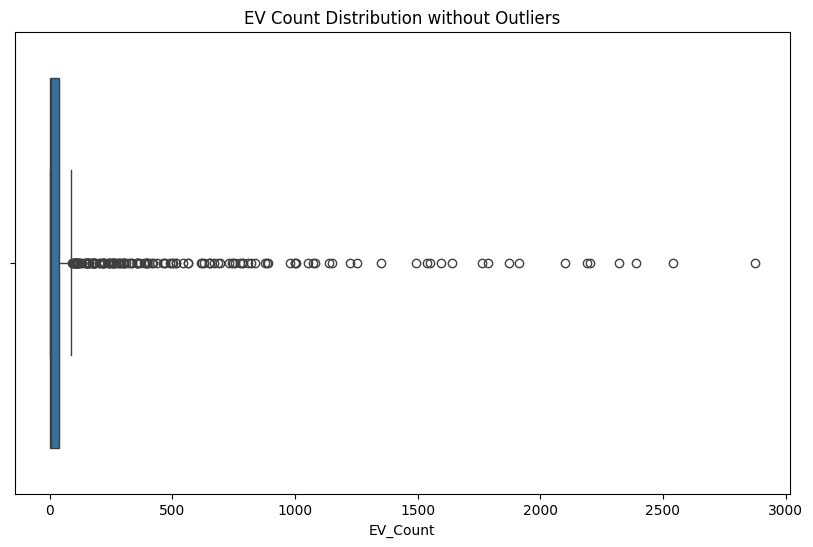

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to visualize the EV counts without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['EV_Count'])
plt.title('EV Count Distribution without Outliers')
plt.show()

**Visualize the Cleaned Data**

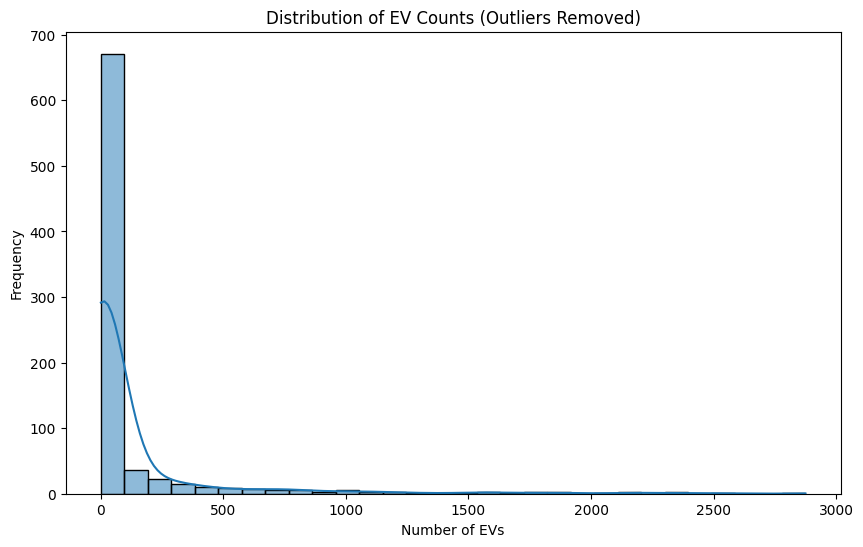

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of EV counts
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['EV_Count'], bins=30, kde=True)
plt.title('Distribution of EV Counts (Outliers Removed)')
plt.xlabel('Number of EVs')
plt.ylabel('Frequency')
plt.show()

# Relevant Features for Outlier Analysis

The following numerical features are relevant for outlier analysis:

- Model Year
- Electric Range
- Base MSRP
- 2020 Census Tract

# Analyzing and Removing Outliers

- I will use the Z-score method to identify and remove outliers for each of these numerical features

**Calculate Z-Scores for Relevant Features**

In [25]:
# Calculate Z-scores for each relevant feature
df['Model_Year_Z_Score'] = stats.zscore(df['Model Year'])
df['Electric_Range_Z_Score'] = stats.zscore(df['Electric Range'])
df['Base_MSRP_Z_Score'] = stats.zscore(df['Base MSRP'])
df['Census_Tract_Z_Score'] = stats.zscore(df['2020 Census Tract'])

**Identify Outliers**

In [26]:
# Identify and print outliers with Z-scores greater than 3 or less than -3

# Model Year Outliers
outliers_model_year = df[(df['Model_Year_Z_Score'] > 3) | (df['Model_Year_Z_Score'] < -3)]
print("Model Year Outliers:")
print(outliers_model_year[['Model Year', 'Model_Year_Z_Score']])
print("\n")

Model Year Outliers:
        Model Year  Model_Year_Z_Score
8             2011           -3.296015
68            2011           -3.296015
87            2011           -3.296015
93            2011           -3.296015
319           2011           -3.296015
...            ...                 ...
198865        2010           -3.629913
198968        2011           -3.296015
199198        2011           -3.296015
199451        2011           -3.296015
199838        2011           -3.296015

[781 rows x 2 columns]




# Interpretation:

- The results indicate that 781 rows in your dataset were identified as outliers based on the Model Year feature. These rows have significantly low Z-scores, indicating that the model years of the vehicles in these rows are unusually older compared to the rest of the dataset.

**Z-Score Interpretation:**
- Z-Score of -3.296015: The majority of the outliers have a Z-score of approximately -3.3, which means that these model years are more than 3 standard deviations below the mean model year in your dataset. This is quite significant and suggests these years are much older than the average model year.
Z-Score of -3.629913: A small subset of the outliers has an even lower Z-score of around -3.63, indicating an even greater deviation from the mean.

**Specific Model Years:**
- The outliers are predominantly from the years 2010 and 2011. These years are considered outliers because the bulk of your dataset likely consists of vehicles from more recent years, making 2010 and 2011 stand out as significantly older.

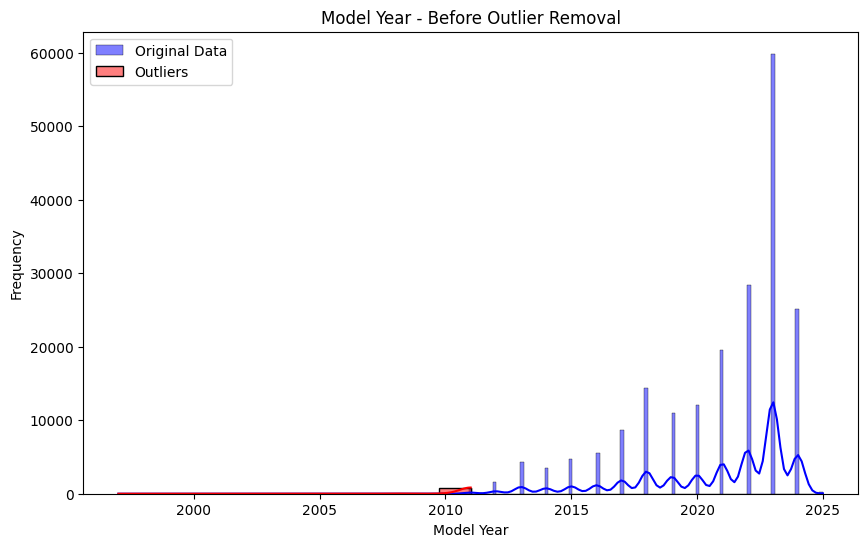

In [44]:
# Model Year Outliers Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Model Year'], kde=True, color='blue', label='Original Data')
sns.histplot(outliers_model_year['Model Year'], kde=True, color='red', label='Outliers')
plt.title('Model Year - Before Outlier Removal')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [33]:
# Assuming df is your DataFrame
total_rows = df.shape[0]

# Print the total number of rows
print(f"The dataset contains {total_rows} rows.")


The dataset contains 200040 rows.


In [36]:
# Electric Range Outliers
outliers_electric_range = df[(df['Electric_Range_Z_Score'] > 3) | (df['Electric_Range_Z_Score'] < -3)]
print("Electric Range Outliers:")
print(outliers_electric_range[['Electric Range', 'Electric_Range_Z_Score']])
print("\n")

Electric Range Outliers:
        Electric Range  Electric_Range_Z_Score
23                 322                3.026558
69                 322                3.026558
85                 322                3.026558
161                322                3.026558
170                322                3.026558
...                ...                     ...
199884             322                3.026558
199952             322                3.026558
199978             322                3.026558
200010             322                3.026558
200030             322                3.026558

[2142 rows x 2 columns]




# Interpretation:

- The results indicate that 2,142 rows in your dataset were identified as outliers based on the Electric Range feature. These rows all have a significantly high Z-score, specifically around 3.03, indicating that the electric range of the vehicles in these rows is unusually high compared to the rest of the dataset.

**Z-Score Interpretation:**

- Z-Score of 3.026558: A Z-score of approximately 3.03 means that these electric ranges are more than 3 standard deviations above the mean electric range in your dataset. This indicates that these vehicles have significantly higher ranges than the typical vehicles in your dataset.

**Specific Electric Range:**

- The outliers are all associated with an electric range of 322 miles. This suggests that the vehicles identified as outliers are likely from a specific model or a few models that offer a much higher electric range than the average in your dataset.

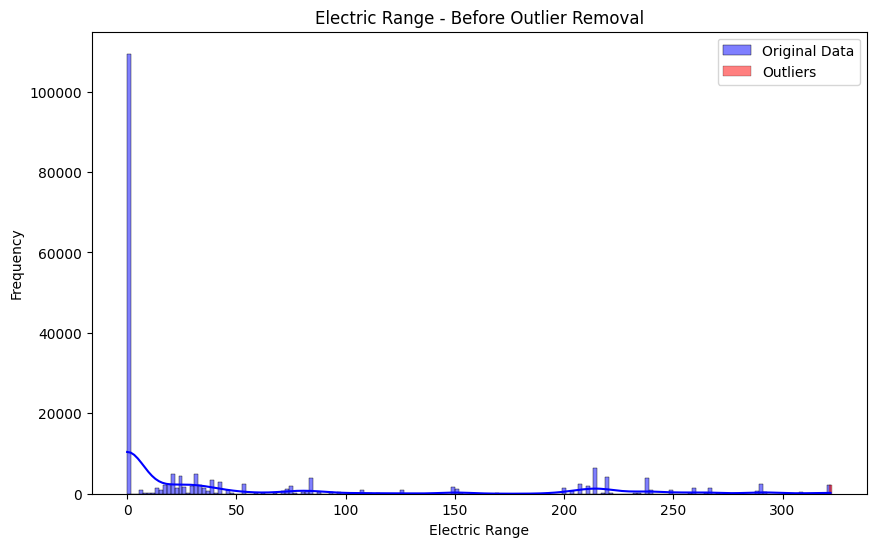

In [43]:
# Electric Range Outliers Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], kde=True, color='blue', label='Original Data')
sns.histplot(outliers_electric_range['Electric Range'], kde=True, color='red', label='Outliers')
plt.title('Electric Range - Before Outlier Removal')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [39]:
# Base MSRP Outliers
outliers_base_msrp = df[(df['Base_MSRP_Z_Score'] > 3) | (df['Base_MSRP_Z_Score'] < -3)]
print("Base MSRP Outliers:")
print(outliers_base_msrp[['Base MSRP', 'Base_MSRP_Z_Score']])
print("\n")

Base MSRP Outliers:
        Base MSRP  Base_MSRP_Z_Score
59          52900           8.496860
166         44100           7.062127
190         52900           8.496860
225         44100           7.062127
256         52900           8.496860
...           ...                ...
199697      52900           8.496860
199738      52900           8.496860
199746      52900           8.496860
199922      52900           8.496860
199958      52900           8.496860

[3319 rows x 2 columns]




**Interpretation:**

- The results indicate that 3,319 rows in your dataset were identified as outliers based on the Base MSRP feature. These rows have significantly high Z-scores, with values around 7.06 and 8.50, indicating that the base MSRP (Manufacturer's Suggested Retail Price) of the vehicles in these rows is unusually high compared to the rest of the dataset.

**Z-Score Interpretation:**

- Z-Scores of 7.062127 and 8.496860: These Z-scores suggest that the base MSRP values in these rows are far above the mean MSRP in your dataset—more than 7 and 8 standard deviations, respectively, above the average. Such high Z-scores are extremely unusual, highlighting that these prices are significant outliers.

**Specific Base MSRP Values:**

- The outliers are associated with base MSRP values of $52,900 and $44,100. These values are consistently identified as outliers across many entries in the dataset.

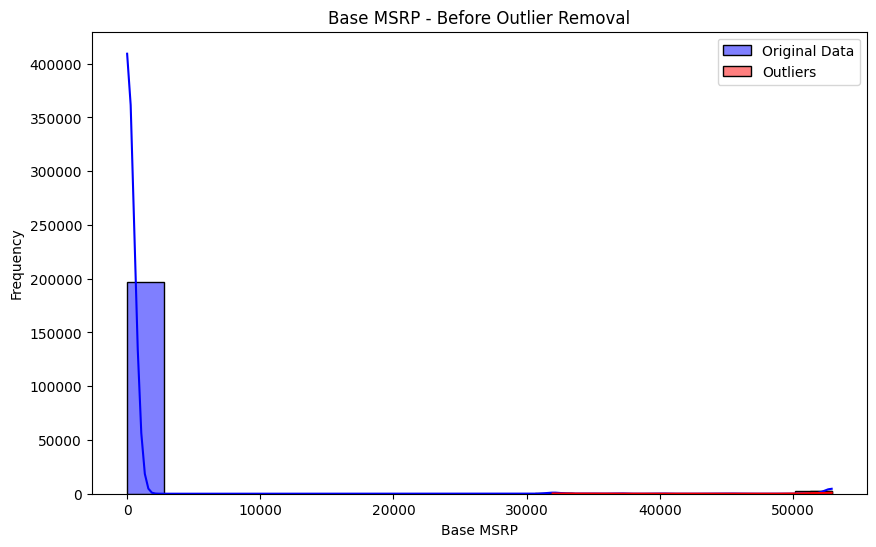

In [41]:
# Base MSRP Outliers Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Base MSRP'], kde=True, color='blue', label='Original Data')
sns.histplot(outliers_base_msrp['Base MSRP'], kde=True, color='red', label='Outliers')
plt.title('Base MSRP - Before Outlier Removal')
plt.xlabel('Base MSRP')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [45]:
# 2020 Census Tract Outliers
outliers_census_tract = df[(df['Census_Tract_Z_Score'] > 3) | (df['Census_Tract_Z_Score'] < -3)]
print("2020 Census Tract Outliers:")
print(outliers_census_tract[['2020 Census Tract', 'Census_Tract_Z_Score']])
print("\n")

2020 Census Tract Outliers:
        2020 Census Tract  Census_Tract_Z_Score
279          8.035015e+09            -27.989100
281          4.013061e+09            -30.493990
23864        6.073017e+09            -29.211040
38632        2.403788e+10            -18.022447
39316        6.115041e+09            -29.184868
...                   ...                   ...
197719       2.403170e+10            -18.026292
197794       6.077004e+09            -29.208557
198915       4.013105e+09            -30.493963
199184       3.705100e+10             -9.917815
199377       3.906102e+10             -8.665963

[360 rows x 2 columns]




# Interpretation:

The results indicate that 360 rows in your dataset were identified as outliers based on the 2020 Census Tract feature. These rows have extremely low Z-scores, indicating that the 2020 Census Tract values in these rows are highly unusual compared to the rest of the dataset.

**Z-Score Interpretation:**

Extremely Low Z-Scores: The Z-scores range from approximately -8.67 to -30.49, which are exceptionally low. This means that the census tract numbers in these rows are far below the mean value in the dataset, deviating by many standard deviations from the average.

**Specific Census Tract Values:**

The outliers include census tract values like 8.035015e+09 and 4.013061e+09, among others. These values are flagged as outliers because they are significantly different from the rest of the dataset.

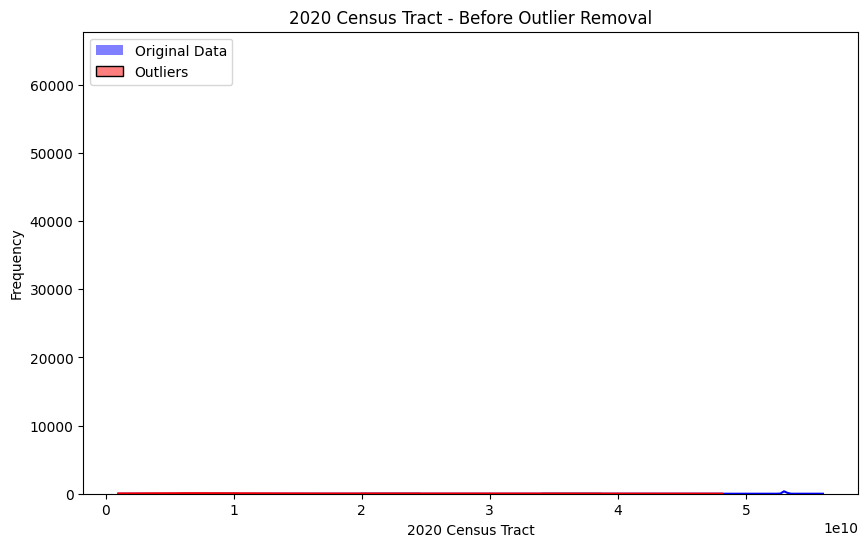

In [47]:
# 2020 Census Tract Outliers Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['2020 Census Tract'], kde=True, color='blue', label='Original Data')
sns.histplot(outliers_census_tract['2020 Census Tract'], kde=True, color='red', label='Outliers')
plt.title('2020 Census Tract - Before Outlier Removal')
plt.xlabel('2020 Census Tract')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Remove Outliers

In [48]:
# Remove outliers from the dataset
df_cleaned = df[
    (df['Model_Year_Z_Score'] <= 3) & (df['Model_Year_Z_Score'] >= -3) &
    (df['Electric_Range_Z_Score'] <= 3) & (df['Electric_Range_Z_Score'] >= -3) &
    (df['Base_MSRP_Z_Score'] <= 3) & (df['Base_MSRP_Z_Score'] >= -3) &
    (df['Census_Tract_Z_Score'] <= 3) & (df['Census_Tract_Z_Score'] >= -3)
]

# Model Year - After Outlier Removal

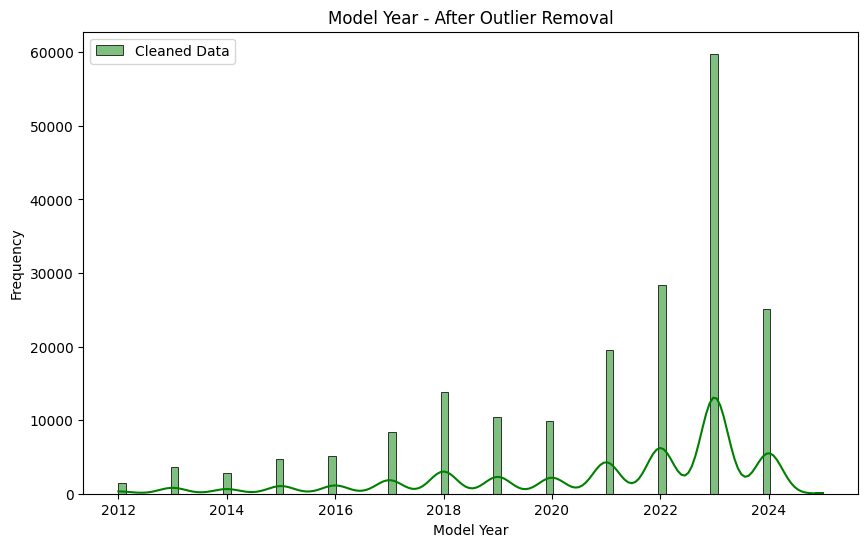

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Model Year'], kde=True, color='green', label='Cleaned Data')
plt.title('Model Year - After Outlier Removal')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Electric Range - After Outlier Removal

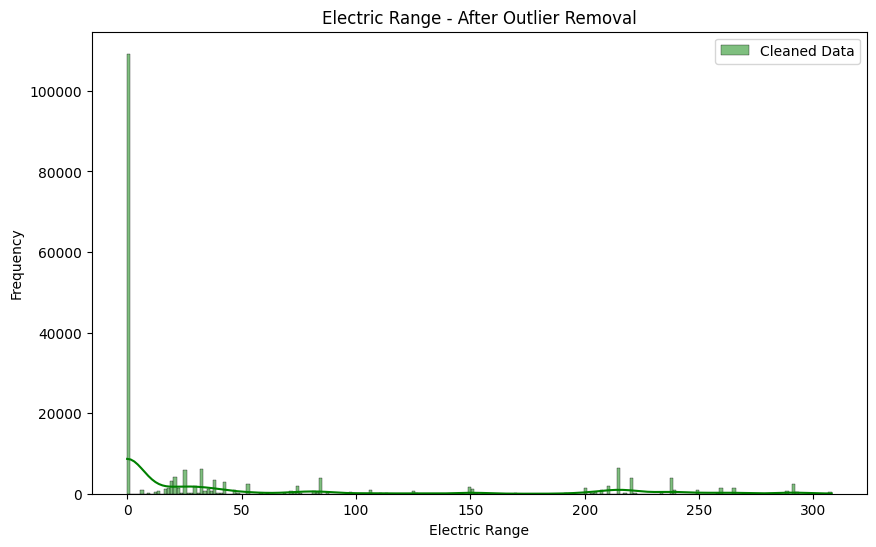

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Electric Range'], kde=True, color='green', label='Cleaned Data')
plt.title('Electric Range - After Outlier Removal')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Base MSRP - After Outlier Removal

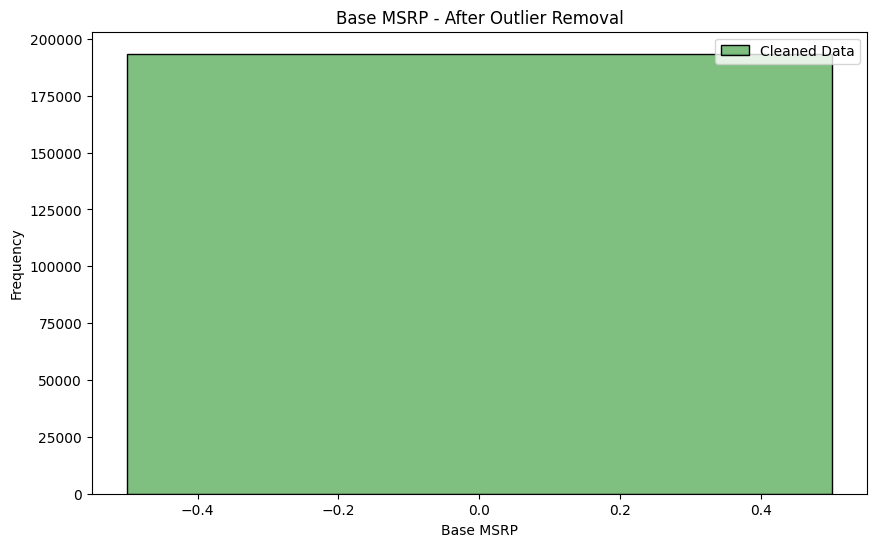

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Base MSRP'], kde=True, color='green', label='Cleaned Data')
plt.title('Base MSRP - After Outlier Removal')
plt.xlabel('Base MSRP')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 2020 Census Tract - After Outlier Removal

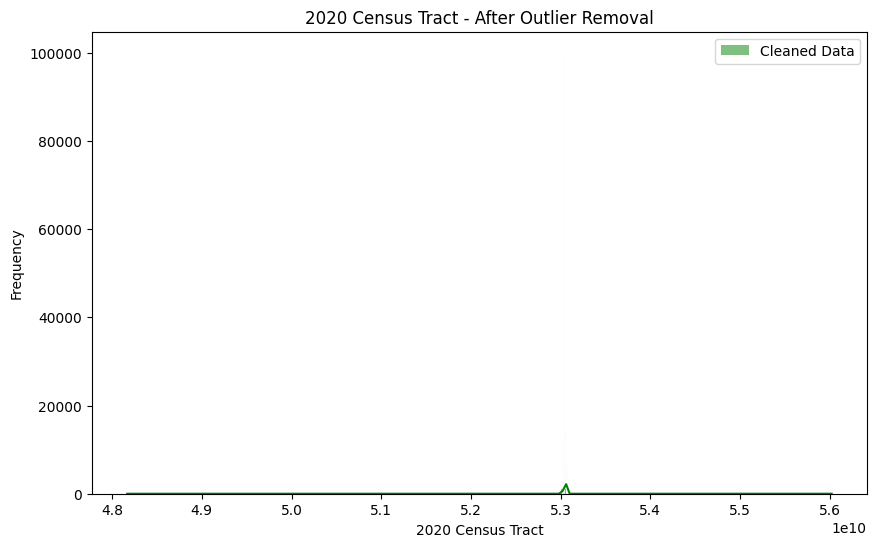

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['2020 Census Tract'], kde=True, color='green', label='Cleaned Data')
plt.title('2020 Census Tract - After Outlier Removal')
plt.xlabel('2020 Census Tract')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display Summary of Outliers Identified & Remaining count after cleaning

In [53]:
# Displaying the number of outliers identified in each feature
outliers_summary = {
    "Feature": ["Model Year", "Electric Range", "Base MSRP", "2020 Census Tract"],
    "Outliers Identified": [
        outliers_model_year.shape[0],
        outliers_electric_range.shape[0],
        outliers_base_msrp.shape[0],
        outliers_census_tract.shape[0]
    ],
    "Original Count": [
        df.shape[0],
        df.shape[0],
        df.shape[0],
        df.shape[0]
    ],
    "Remaining Count After Cleaning": [
        df_cleaned.shape[0],
        df_cleaned.shape[0],
        df_cleaned.shape[0],
        df_cleaned.shape[0]
    ]
}

outliers_summary_df = pd.DataFrame(outliers_summary)
print(outliers_summary_df)

             Feature  Outliers Identified  Original Count  \
0         Model Year                  781          200040   
1     Electric Range                 2142          200040   
2          Base MSRP                 3319          200040   
3  2020 Census Tract                  360          200040   

   Remaining Count After Cleaning  
0                          193503  
1                          193503  
2                          193503  
3                          193503  


In [54]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Model_Year_Z_Score,Electric_Range_Z_Score,Base_MSRP_Z_Score,Census_Tract_Z_Score
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10,-0.624834,2.440486,-0.127844,0.053310
1,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP,5.307700e+10,0.710756,-0.365899,-0.127844,0.063250
2,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10,-0.290937,1.121823,-0.127844,0.037147
3,JTDKARFP1J,Kitsap,Port Orchard,WA,98367.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,186410087,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10,-0.958732,-0.320816,-0.127844,0.037149
4,5UXTA6C09N,Snohomish,Everett,WA,98208.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,186076915,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10,0.376858,-0.264463,-0.127844,0.053310


In [55]:
# Check the total number of rows in the cleaned DataFrame
total_cleaned_rows = df_cleaned.shape[0]

# Print the total number of rows in the cleaned DataFrame
print(f"The cleaned dataset contains {total_cleaned_rows} rows.")


The cleaned dataset contains 193503 rows.


In [56]:
# Display the column names in the DataFrame
print(df.columns)


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility',
       '2020 Census Tract', 'Model_Year_Z_Score', 'Electric_Range_Z_Score',
       'Base_MSRP_Z_Score', 'Census_Tract_Z_Score'],
      dtype='object')


In [57]:
# Save the Cleaned and Standardized Dataset to Google Drive
cleaned_data_path = '/content/gdrive/My Drive/Colab Notebooks/Electiric vehical/standardized_cleaned_data.csv'
df.to_csv(cleaned_data_path, index=False)

In [58]:
# Confirm the dataset is saved and display the first few rows of the cleaned data
print(f"Cleaned and standardized dataset saved to {cleaned_data_path}")
print(df.head())

Cleaned and standardized dataset saved to /content/gdrive/My Drive/Colab Notebooks/Electiric vehical/standardized_cleaned_data.csv
   VIN (1-10)     County          City State  Postal Code  Model Year    Make  \
0  5YJSA1E28K  Snohomish      Mukilteo    WA      98275.0        2019   TESLA   
1  1C4JJXP68P     Yakima        Yakima    WA      98901.0        2023    JEEP   
2  WBY8P6C05L     Kitsap      Kingston    WA      98346.0        2020     BMW   
3  JTDKARFP1J     Kitsap  Port Orchard    WA      98367.0        2018  TOYOTA   
4  5UXTA6C09N  Snohomish       Everett    WA      98208.0        2022     BMW   

         Model                   Electric Vehicle Type  \
0      MODEL S          Battery Electric Vehicle (BEV)   
1     WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
2           I3          Battery Electric Vehicle (BEV)   
3  PRIUS PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
4           X5  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle 

In [75]:
# Access your dataset
data_path = '/content/gdrive/My Drive/Colab Notebooks/Electiric vehical/standardized_cleaned_data.csv'

In [76]:
df = pd.read_csv(data_path)
# Display the first few rows of the DataFrame
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Model_Year_Z_Score,Electric_Range_Z_Score,Base_MSRP_Z_Score,Census_Tract_Z_Score
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10,-0.624834,2.440486,-0.127844,0.053310
1,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP,5.307700e+10,0.710756,-0.365899,-0.127844,0.063250
2,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10,-0.290937,1.121823,-0.127844,0.037147
3,JTDKARFP1J,Kitsap,Port Orchard,WA,98367.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,186410087,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10,-0.958732,-0.320816,-0.127844,0.037149
4,5UXTA6C09N,Snohomish,Everett,WA,98208.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,186076915,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10,0.376858,-0.264463,-0.127844,0.053310


In [78]:
from scipy import stats

# List of numerical columns to check for outliers
numerical_columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'DOL Vehicle ID', '2020 Census Tract']

# Recalculate Z-scores for these columns
z_scores = df[numerical_columns].apply(stats.zscore)

# Check for any remaining outliers
outliers_remaining = (z_scores.abs() > 3).sum()

# Display the number of outliers remaining for each feature
print("Remaining outliers in each feature:")
print(outliers_remaining)


Remaining outliers in each feature:
Postal Code           322
Model Year            781
Electric Range       2142
Base MSRP            3319
DOL Vehicle ID       9120
2020 Census Tract     360
dtype: int64


In [79]:
from scipy import stats

# List of numerical columns to check for outliers
numerical_columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'DOL Vehicle ID', '2020 Census Tract']

# Recalculate Z-scores for these columns
z_scores = df[numerical_columns].apply(stats.zscore)

# Remove rows with any outliers in these features
df_cleaned = df[(z_scores.abs() <= 3).all(axis=1)]

# Verify if the outliers have been removed
remaining_outliers = (df_cleaned[numerical_columns].apply(stats.zscore).abs() > 3).sum()

# Display the number of outliers remaining for each feature
print("Remaining outliers in each feature (after final cleaning):")
print(remaining_outliers)

# Display the number of rows remaining
print(f"The dataset contains {df_cleaned.shape[0]} rows after removing outliers.")


Remaining outliers in each feature (after final cleaning):
Postal Code          7048
Model Year           1357
Electric Range       3529
Base MSRP               0
DOL Vehicle ID       1070
2020 Census Tract       0
dtype: int64
The dataset contains 185103 rows after removing outliers.


In [83]:
# Confirm that the DataFrame is not empty and has the expected structure
print(df_cleaned.info())
print(df_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
Index: 185103 entries, 0 to 200039
Data columns (total 20 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         185103 non-null  object 
 1   County                                             185103 non-null  object 
 2   City                                               185103 non-null  object 
 3   State                                              185103 non-null  object 
 4   Postal Code                                        185103 non-null  float64
 5   Model Year                                         185103 non-null  int64  
 6   Make                                               185103 non-null  object 
 7   Model                                              185103 non-null  object 
 8   Electric Vehicle Type                              185103 non-null  object 
 9 

In [84]:
from scipy import stats

# List of numerical columns to check for outliers
numerical_columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'DOL Vehicle ID', '2020 Census Tract']

# Recalculate Z-scores for these columns
z_scores = df[numerical_columns].apply(stats.zscore)

# Remove rows with any outliers in these features
df_cleaned = df[(z_scores.abs() <= 3).all(axis=1)]

# Verify if the outliers have been removed
remaining_outliers = (df_cleaned[numerical_columns].apply(stats.zscore).abs() > 3).sum()

# Display the number of outliers remaining for each feature
print("Remaining outliers in each feature (after final cleaning):")
print(remaining_outliers)

# Display the number of rows remaining
print(f"The dataset contains {df_cleaned.shape[0]} rows after removing outliers.")


Remaining outliers in each feature (after final cleaning):
Postal Code          7048
Model Year           1357
Electric Range       3529
Base MSRP               0
DOL Vehicle ID       1070
2020 Census Tract       0
dtype: int64
The dataset contains 185103 rows after removing outliers.


In [85]:
# Define the path to save the cleaned dataset
cleaned_data_final_path = '/content/gdrive/My Drive/Colab Notebooks/Electiric vehical/cleaned_data_no_outliers.csv'

# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv(cleaned_data_final_path, index=False)

# Print confirmation
print(f"Final cleaned dataset saved to {cleaned_data_final_path}")


Final cleaned dataset saved to /content/gdrive/My Drive/Colab Notebooks/Electiric vehical/cleaned_data_no_outliers.csv


In [86]:
# List files in the target directory to confirm the file is saved
import os

# Path to the directory where the file should be saved
directory_path = '/content/gdrive/My Drive/Colab Notebooks/Electiric vehical/'

# List the files in the directory
files_in_directory = os.listdir(directory_path)

# Check if the file is present
if 'cleaned_data_no_outliers.csv' in files_in_directory:
    print("File successfully saved.")
else:
    print("File not found. Something went wrong with the saving process.")


File successfully saved.


In [87]:
# Load the saved cleaned dataset
df_loaded = pd.read_csv(cleaned_data_final_path)

# Check the number of rows in the reloaded dataset
print(f"The reloaded dataset contains {df_loaded.shape[0]} rows.")

# Display the first few rows to verify the content
print(df_loaded.head())


The reloaded dataset contains 185103 rows.
   VIN (1-10)     County          City State  Postal Code  Model Year    Make  \
0  5YJSA1E28K  Snohomish      Mukilteo    WA      98275.0        2019   TESLA   
1  1C4JJXP68P     Yakima        Yakima    WA      98901.0        2023    JEEP   
2  WBY8P6C05L     Kitsap      Kingston    WA      98346.0        2020     BMW   
3  JTDKARFP1J     Kitsap  Port Orchard    WA      98367.0        2018  TOYOTA   
4  5UXTA6C09N  Snohomish       Everett    WA      98208.0        2022     BMW   

         Model                   Electric Vehicle Type  \
0      MODEL S          Battery Electric Vehicle (BEV)   
1     WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
2           I3          Battery Electric Vehicle (BEV)   
3  PRIUS PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
4           X5  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligibl

**Remove the Outliers**

In [93]:
from scipy import stats

# Load the saved cleaned dataset
cleaned_data_final_path = '/content/gdrive/My Drive/Colab Notebooks/Electiric vehical/cleaned_data_no_outliers.csv'
df_loaded = pd.read_csv(cleaned_data_final_path)

# Recalculate Z-scores for 'Model Year' and 'Electric Range'
df_loaded['Model_Year_Z_Score'] = stats.zscore(df_loaded['Model Year'])
df_loaded['Electric_Range_Z_Score'] = stats.zscore(df_loaded['Electric Range'])

# Remove outliers from 'Model Year' and 'Electric Range'
df_cleaned_final = df_loaded[
    (df_loaded['Model_Year_Z_Score'].abs() <= 3) &
    (df_loaded['Electric_Range_Z_Score'].abs() <= 3)
]

# Drop the Z-score columns as they are no longer needed
df_cleaned_final = df_cleaned_final.drop(columns=['Model_Year_Z_Score', 'Electric_Range_Z_Score'])

# Check the number of rows remaining after removing these outliers
print(f"Number of rows after removing outliers from 'Model Year' and 'Electric Range': {df_cleaned_final.shape[0]}")


Number of rows after removing outliers from 'Model Year' and 'Electric Range': 180217


In [104]:
# Check the number of rows in the final cleaned dataset
final_row_count = df_cleaned_final.shape[0]

# Display the number of rows
print(f"The final cleaned dataset contains {final_row_count} rows.")


The final cleaned dataset contains 175826 rows.


In [106]:
# List of numerical columns to check for outliers
numerical_columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'DOL Vehicle ID', '2020 Census Tract']

# Recalculate Z-scores for these columns
df_cleaned_final_zscores = df_cleaned_final[numerical_columns].apply(stats.zscore)

# Check for any remaining outliers in all features
remaining_outliers_all_features = (df_cleaned_final_zscores.abs() > 3).sum()

# Display the number of outliers remaining for each feature
print("Remaining outliers in each feature after final cleaning:")
print(remaining_outliers_all_features)


Remaining outliers in each feature after final cleaning:
Postal Code          6637
Model Year              0
Electric Range       3725
Base MSRP               0
DOL Vehicle ID        784
2020 Census Tract       0
dtype: int64


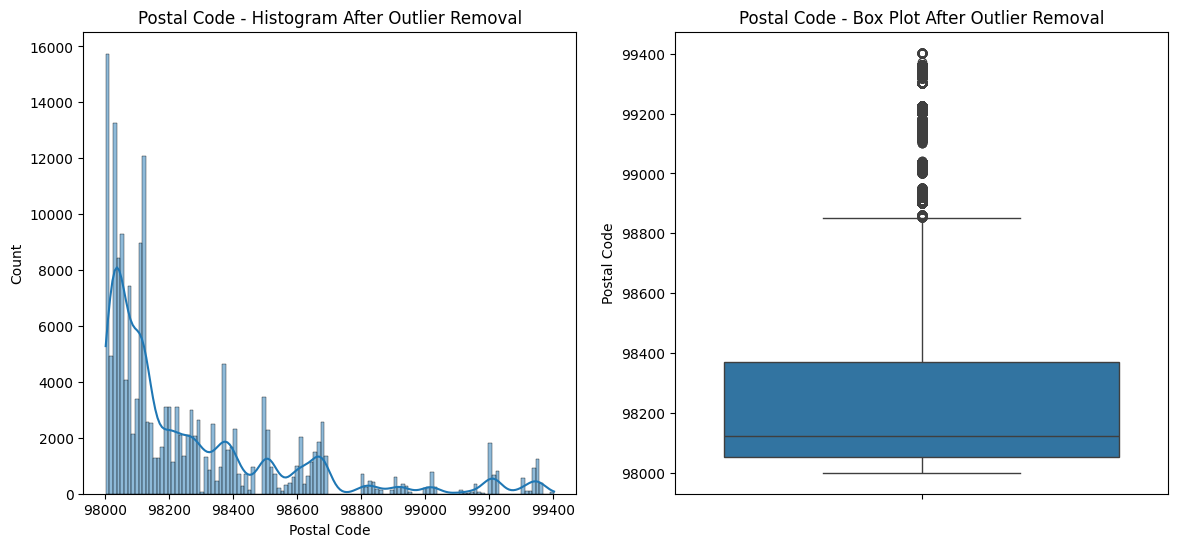

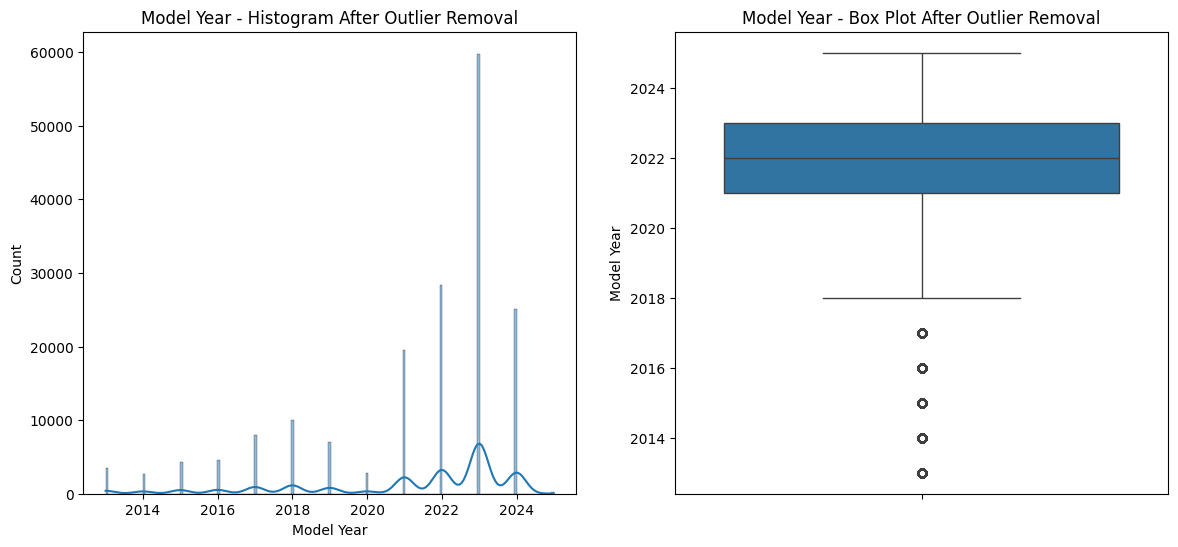

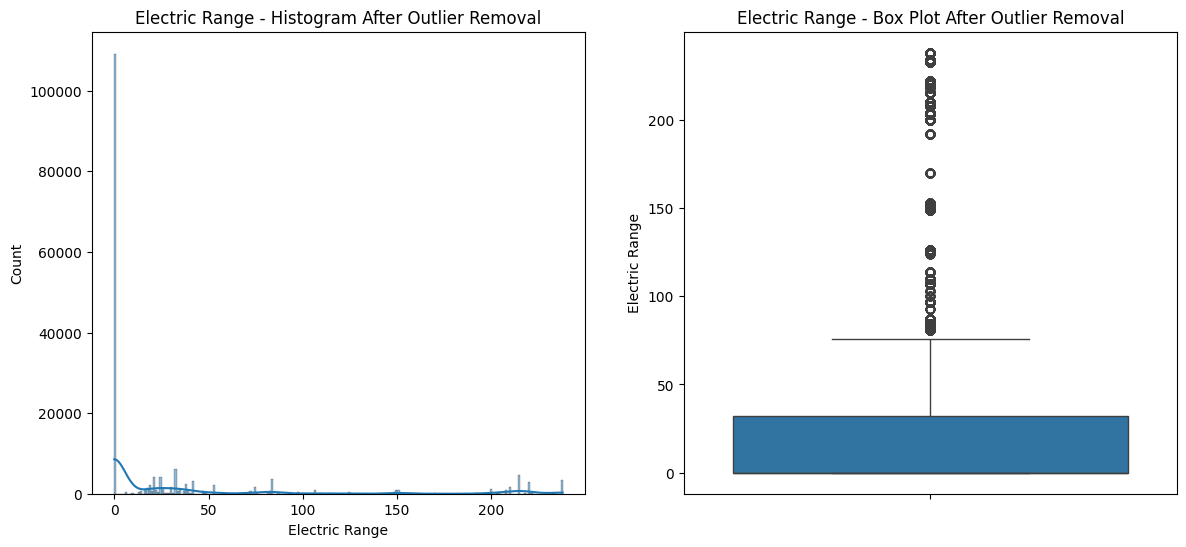

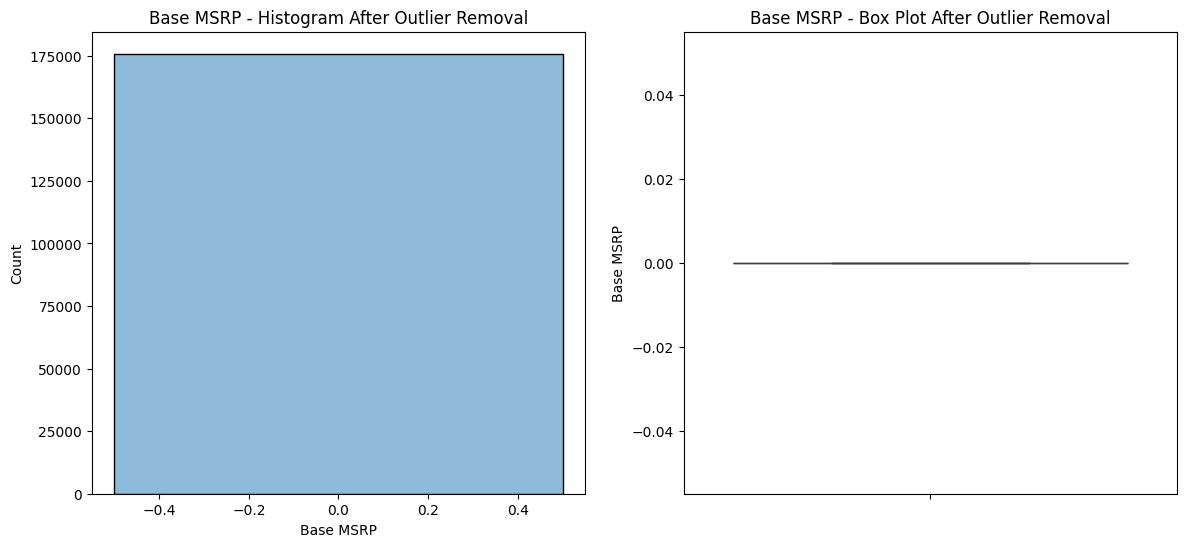

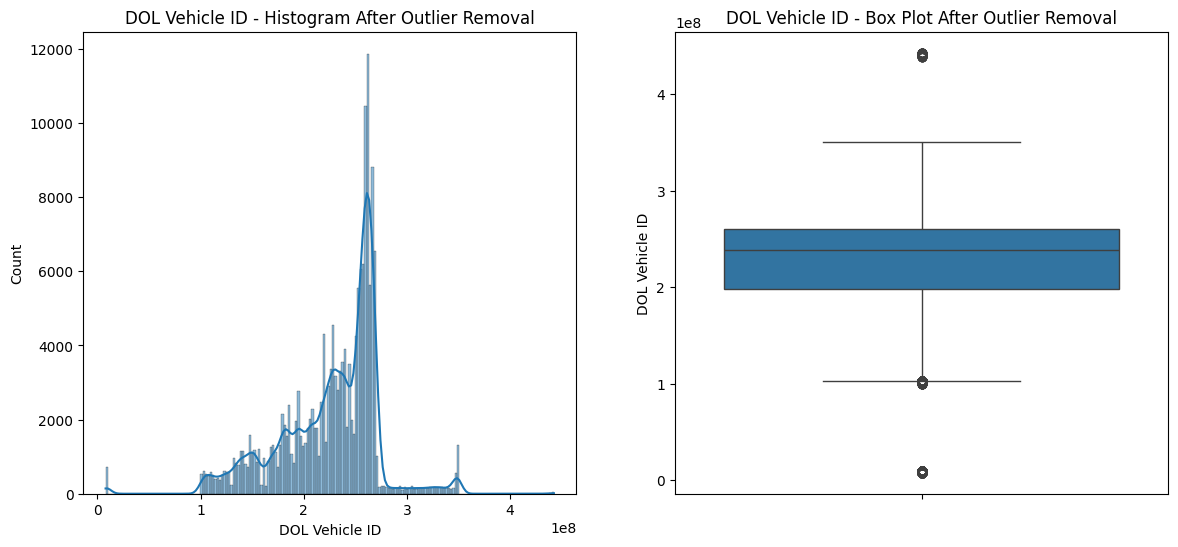

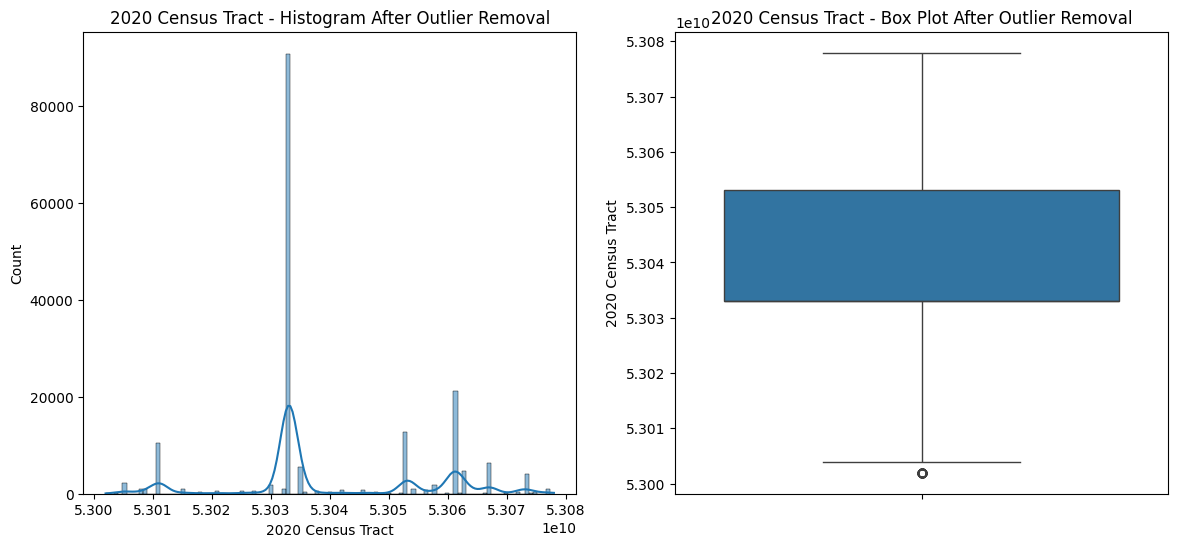

In [107]:
# List of numerical columns to visualize
numerical_columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'DOL Vehicle ID', '2020 Census Tract']

# Create histograms and box plots for each numerical feature after cleaning
for col in numerical_columns:
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned_final[col], kde=True)
    plt.title(f'{col} - Histogram After Outlier Removal')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(df_cleaned_final[col])
    plt.title(f'{col} - Box Plot After Outlier Removal')

    plt.show()


In [108]:
# Identify any Z-score columns in the DataFrame
z_score_columns = [col for col in df_cleaned_final.columns if 'Z_Score' in col]

# Drop the Z-score columns if they exist
df_cleaned_final = df_cleaned_final.drop(columns=z_score_columns, errors='ignore')

# Verify that the Z-score columns have been removed
print("Remaining columns after dropping Z-score columns:")
print(df_cleaned_final.columns)


Remaining columns after dropping Z-score columns:
Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility',
       '2020 Census Tract'],
      dtype='object')


In [109]:
# Save the cleaned dataset without the outliers
final_data_path = '/content/gdrive/My Drive/Colab Notebooks/Electiric vehical/final_cleaned_data.csv'
df_cleaned_final.to_csv(final_data_path, index=False)

print(f"Final cleaned dataset saved to {final_data_path}")


Final cleaned dataset saved to /content/gdrive/My Drive/Colab Notebooks/Electiric vehical/final_cleaned_data.csv


In [110]:
# Load the final cleaned dataset
final_data_path = '/content/gdrive/My Drive/Colab Notebooks/Electiric vehical/final_cleaned_data.csv'
df_final = pd.read_csv(final_data_path)

# Check the total number of rows and columns in the dataset
total_rows = df_final.shape[0]
total_columns = df_final.shape[1]

# Display the number of rows and columns
print(f"Total rows: {total_rows}, Total columns: {total_columns}")


Total rows: 175826, Total columns: 16
